# Project: (No Show Appointments Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction


The number of appointments dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. I have chosen to focus on the variable 'No_Show' and different aspects that will influence the amount of appointments. After the data wrangling, I have proposed three questions to solve in my data analysis.

In [280]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 18})


<a id='wrangling'></a>
## Data Wrangling

In [281]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [282]:
# Fix the column names to be more consistent with each other. Correct the typos in some columns to be more readable

df.rename(columns={'PatientId':'Patient_Id',
                   'AppointmentID':'Appointment_Id',
                   'ScheduledDay':'Scheduled_Day',
                   'Neighbourhood':'Neighborhood',
                   'AppointmentDay':'Appointment_Day',
                   'Hipertension':'Hypertension',
                  'Handcap':'Handicap',
                   'No-show':'No_Show'},inplace =True)

In [283]:
#change patient_ID to an int to get rid of the scientific ntation format that looked messy
df['Patient_Id'] = df['Patient_Id'].astype(int)


In [284]:
# Cut off the timestamp in seconds as that is needed for this analysis
df['Scheduled_Day'] = df['Scheduled_Day'].apply(lambda x: x[:10])

In [285]:
# Change the format given to datetime to more accurately represent the data
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])

In [286]:
# Change the format given to datetime to more accurately represent the data
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_Id         110527 non-null int64
Appointment_Id     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null datetime64[ns]
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighborhood       110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [288]:
df.head(5)

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Questions
<br>

 <p style = 'font-size:20px; text-align:center;'> With the dataset cleaned and ready for analysis, we are going to dive<br>
into a few questions that will help explain this dataset better</p>
 <br>
 
<ul style = 'font-size:20px;list-style:none;text-align:center;'> 
    <li>1. Who shows up for appointments more often, women or men?</li>
    <br>
    <li> 2. What neighborhood that has over 50 absences has the highest absence amount?</li>
    <br>
    <li>3. What Age range has scheduled the most appointments??</li>
     
</ul>

### Research Question 1



<p style = 'color:red;font-size:20px'>Who shows up for appointments more often, women or men? </p>

<p style = 'color:green'>First we must find the total value of appointments made for each Gender</p>

In [289]:
gen_f = df['Gender'].value_counts()
gen_f

F    71840
M    38687
Name: Gender, dtype: int64

<p style = 'color:green'>Next we need to find how many appointments scheduled appointments were actually attended</p>

In [290]:
gen_q = df.query('No_Show == "No"')


In [291]:
# Find the amount that were attended

gen_hei = gen_q.groupby('Gender').No_Show.count()
gen_hei

Gender
F    57246
M    30962
Name: No_Show, dtype: int64

<p style = 'color:green'>We must divide the total appointents by the amount of appointments actually attended to find the percentage that were attended</p>

In [292]:
gen_final  = gen_hei/gen_f
gen_final

Gender
F    0.796854
M    0.800321
dtype: float64

<p style = 'color:green'>Next we will plot the numbers in decimal form to show just exactly how much each Gender attended their scheduled appointments</p>

Text(1,0.800321,'0.800321')

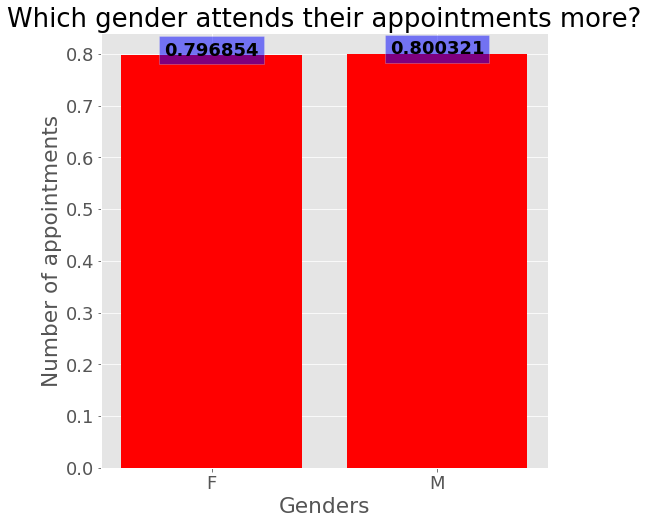

In [293]:
plt.subplots(figsize=(8,8))
x = np.arange(2)
plt.bar(x,gen_final,tick_label = ['F','M'],color='red')
plt.title('Which gender attends their appointments more?')
plt.xlabel('Genders')
plt.ylabel('Number of appointments')
plt.text(0,gen_final[0],'0.796854',fontweight = 'bold',horizontalalignment ='center',bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 5})
plt.text(1,gen_final[1],'0.800321',fontweight = 'bold',horizontalalignment ='center',bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 5})


<p style = 'color:green'> We will convert the numbers to percentages to finalize the conclusion</p>

In [294]:

gen_comp = gen_final.apply(lambda x: "{:.2%}".format(x))

gen_comp




Gender
F    79.69%
M    80.03%
dtype: object

<p style = 'color:green;font-size:20px'>Even though women scheduled more appointments overall, the men have a slight advantage when it comes to attending their scheduled appointments. There is a .34% discrepancy between the genders in fact. I suspected men to schedule less, but it looks like they mean business when it actually comes down to getting their health together.</p>

### Research Question 2 

<p style = 'color:red;font-size:20px'>What neighborhood that has over 50 absences has the highest absence amount? </p>

<p style = 'color:purple;'>We need to find all of the data that shows that an appointment was missed to begin analysis</p>

In [295]:
missed_scholar = df.query('No_Show == "Yes"').reset_index(drop=True)
missed_scholar

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
1,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
2,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
3,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
4,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
5,12154843752835,5628338,F,2016-04-27,2016-04-29,4,CONQUISTA,0,0,0,0,0,0,Yes
6,863229818887631,5616091,M,2016-04-25,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,Yes
7,311284853849,5628907,M,2016-04-27,2016-04-29,12,NOVA PALESTINA,1,0,0,0,0,0,Yes
8,274164858852,5635414,F,2016-04-28,2016-04-29,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes
9,8545415176986,5618643,F,2016-04-26,2016-04-29,58,SÃO CRISTÓVÃO,0,0,0,0,0,1,Yes


<p style = 'color:purple;'>We will then Groupby Neighborhood as that is the filter that we want. In addition we will count how many No Shows there were for each.</p>

In [296]:
num_miss = missed_scholar.groupby('Neighborhood').No_Show.count()
num_miss

Neighborhood
AEROPORTO                1
ANDORINHAS             521
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
BELA VISTA             384
BENTO FERREIRA         193
BOA VISTA               58
BONFIM                 550
CARATOÍRA              591
CENTRO                 703
COMDUSA                 56
CONQUISTA              160
CONSOLAÇÃO             237
CRUZAMENTO             304
DA PENHA               429
DE LOURDES              47
DO CABRAL               88
DO MOSCOSO              92
DO QUADRO              140
ENSEADA DO SUÁ          52
ESTRELINHA             106
FONTE GRANDE           149
FORTE SÃO JOÃO         346
FRADINHOS               48
GOIABEIRAS             137
GRANDE VITÓRIA         217
GURIGICA               456
HORTO                   42
ILHA DAS CAIEIRAS      235
                      ... 
NOVA PALESTINA         402
PARQUE MOSCOSO         179
PIEDADE                 88
PONTAL DE CAMBURI       12
PRAIA DO CANTO         190
PRAIA DO SUÁ   

<p style = 'color:purple;'>Next we will find the Neighborhoods that have over 50 absences</p>

In [297]:
num_miss_50 = num_miss.to_frame().query('No_Show > 50 ').reset_index()
num_miss_50

,Neighborhood,No_Show
0,ANDORINHAS,521
1,ARIOVALDO FAVALESSA,62
2,BARRO VERMELHO,91
3,BELA VISTA,384
4,BENTO FERREIRA,193
5,BOA VISTA,58
6,BONFIM,550
7,CARATOÍRA,591
8,CENTRO,703
9,COMDUSA,56


<p style = 'color:purple;'>To consolidate and make our data much cleaner, we will only report on the neighborhoods greater than the mean of all the missed appointments over 50</p>

In [298]:
num_miss_50.No_Show.mean()

332.87878787878788

In [299]:
# Find the neighborhoods over the mean since we are looking for the highest neighborhood

num_final = num_miss_50.query('No_Show > 86').reset_index(drop=True)
num_final

,Neighborhood,No_Show
0,ANDORINHAS,521
1,BARRO VERMELHO,91
2,BELA VISTA,384
3,BENTO FERREIRA,193
4,BONFIM,550
5,CARATOÍRA,591
6,CENTRO,703
7,CONQUISTA,160
8,CONSOLAÇÃO,237
9,CRUZAMENTO,304


In [300]:
# Create column name variable

column_name = num_final['Neighborhood']
column_name

0              ANDORINHAS
1          BARRO VERMELHO
2              BELA VISTA
3          BENTO FERREIRA
4                  BONFIM
5               CARATOÍRA
6                  CENTRO
7               CONQUISTA
8              CONSOLAÇÃO
9              CRUZAMENTO
10               DA PENHA
11              DO CABRAL
12             DO MOSCOSO
13              DO QUADRO
14             ESTRELINHA
15           FONTE GRANDE
16         FORTE SÃO JOÃO
17             GOIABEIRAS
18         GRANDE VITÓRIA
19               GURIGICA
20      ILHA DAS CAIEIRAS
21    ILHA DE SANTA MARIA
22       ILHA DO PRÍNCIPE
23             INHANGUETÁ
24                ITARARÉ
25                 JABOUR
26         JARDIM CAMBURI
27        JARDIM DA PENHA
28      JESUS DE NAZARETH
29            JOANA D´ARC
30            JUCUTUQUARA
31            MARIA ORTIZ
32                MARUÍPE
33          MATA DA PRAIA
34             MONTE BELO
35         NOVA PALESTINA
36         PARQUE MOSCOSO
37                PIEDADE
38         P

Text(0,0.5,'Number of missed appointments')

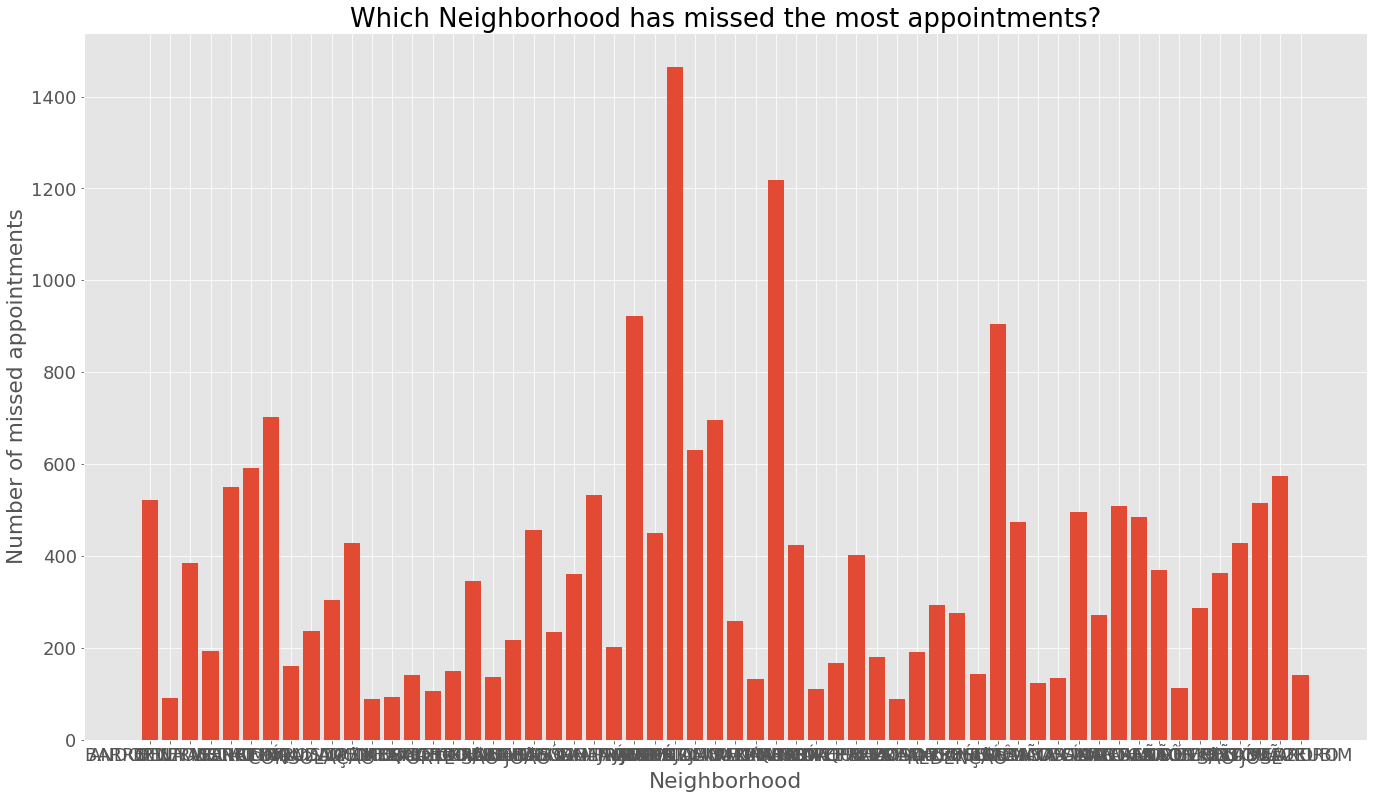

In [301]:
plt.subplots(figsize = (23,13))
plt.bar(num_final.index,num_final['No_Show'],tick_label=column_name)
plt.title('Which Neighborhood has missed the most appointments?')
plt.xlabel('Neighborhood')
plt.ylabel('Number of missed appointments')

<p style = 'color:purple;font-size:20px;'>To conclude our analysis, it looks like <strong>ILHA DO PRINCIPE </strong>has the highest number of missed appointments throughout all of the neighborhoods included.

### Research Question 3



<p style = 'color:orange;font-size:20px;'>What Age range has scheduled the most appointments?</p>

<p style = 'color:blue;'>The Age column had a value of -1 which I have elected to remove from this part of the analysis as a human being cannot have an age of -1. For this analysis, an age of 0 is assumed for 'birth' related appointments</p>

In [302]:
df.head()

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Patient_Id         110527 non-null int64
Appointment_Id     110527 non-null int64
Gender             110527 non-null object
Scheduled_Day      110527 non-null datetime64[ns]
Appointment_Day    110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighborhood       110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null int64
No_Show            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [304]:
df_A = df[df.Age != -1]
df_A

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


<p style = 'color:blue;'>The next cell is to provide analysis and validity of data for the upcoming histogram</p>

In [305]:
df_Ag=df_A.groupby('Age').No_Show.count().to_frame().reset_index()
df_Ag


,Age,No_Show
0,0,3539
1,1,2273
2,2,1618
3,3,1513
4,4,1299
5,5,1489
6,6,1521
7,7,1427
8,8,1424
9,9,1372


<p style = 'color:blue;'>Histogram is created to show what age range has created the most appointments. The bin range is from 0 to 120 as there are appointments in our data created for someone who is 115 years old.The data above shows the actual numbers </p>

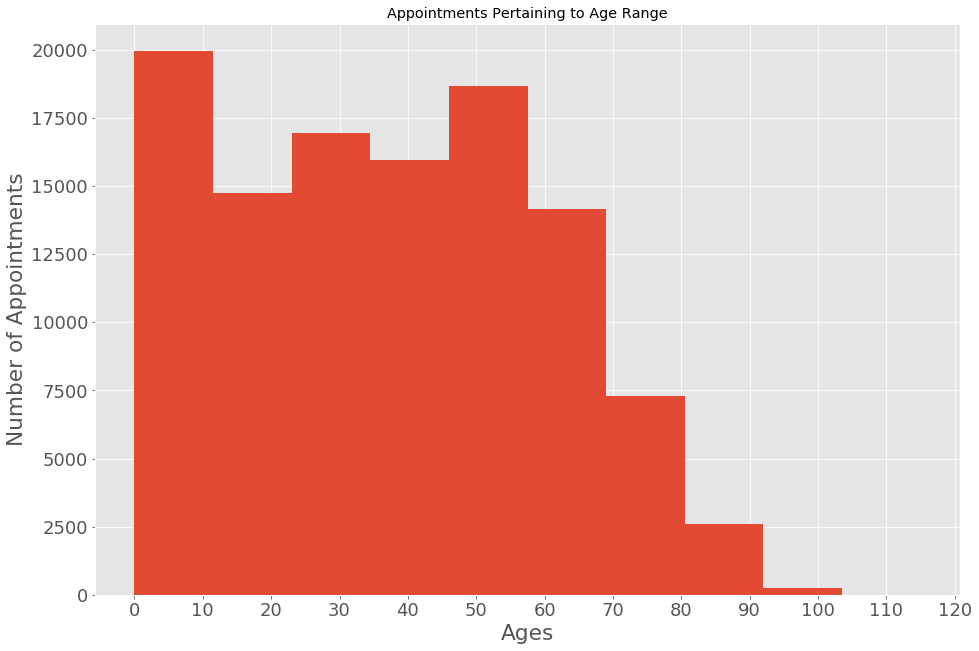

In [306]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_size_inches(15.5, 10.5)
n,bins,patches = ax.hist(df_A.Age,bins = 10)
plt.style.use('ggplot')
plt.title('Appointments Pertaining to Age Range')
plt.xlabel('Ages')
plt.ylabel('Number of Appointments')
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
ax.set_xticklabels([0,10,20,30,40,50,60,70,80,90,100,110,120])

plt.show()

In [307]:
# display the max number of appointments made

df_Ag.No_Show.max()

3539

<p style = 'color:orange;font-size:20px;'>According to our analysis, the most appointments made were for the age group 0-10 which makes sense as this is the adolescent stage. The maximum number of appointments made was for the 0 age group, which seems most reasonable as this has to deal with new births. Another interesting find is that the second highest group is for the 50-60 range.The assumption is the detriment of declining age, and this is the range in which most people retire and are considered 'old'.</p>

<a id='Conclusion'></a>

## Conclusion

I have done many different analyses meauring 'No_Show' appointment against other independent variables to see if there is correlation. Throughout my findings, many of the variables included in this dataset influence the amount of people who make and show up to appointments.

In [308]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0